# Assigment 1

## Spectral Clustering
- Read about spectral clustering module in Python's Scikit Learn Package.

- Choose a dataset from https://datasetsearch.research.google.com/.

- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

- NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

## Chosen Dataset 
## IoT dataset for Intrusion Detection Systems (IDS)

Description:\
The BoTNeTIoT-L01 dataset is a refined version of the detection_of_IoT_botnet_attacks_N_BaIoT (BoTNeTIoT) dataset, consolidating IoT device traffic data into 10-second time windows to reduce redundancy. The dataset captures traffic from nine IoT devices, including two types of botnet attacks (Mirai and Gafgyt). It features twenty-three statistically engineered features derived from .pcap files, computed with seven statistical measures over the time window of 10 seconds (L0.1). These measures include mean, variance, count, magnitude, radius, covariance, and correlation coefficient. The features are extracted from packet count, jitter, size of outbound packets only, and outbound and inbound packets together. Class labels (0 for attacks, 1 for normal samples) categorize the data, and the decay factor value (0.1) is used consistently throughout the dataset and associated papers to denote the time window. This dataset is valuable for research in IoT security and botnet detection, offering a focused and feature-rich perspective on network traffic behavior.

Reference:
- A. Alhowaide, I. Alsmadi, J. Tang. “Towards the design of real-time autonomous IoT NIDS”, Cluster Computing (2021), pages 1-14, Jan 2021.\
- A. Alhowaide, I. Alsmadi, J. Tang, “Features Quality Impact on Cyber Physical Security Systems”, 2019 IEEE 10th Annual Information Technology, Electronics and Mobile Communication Conference (IEMCON), Oct. 2019.\
- A. Alhowaide, I. Alsmadi, J. Tang. “PCA, Random-Forest and Pearson Correlation for Dimensionality Reduction in IoT IDS”, 2020 IEEE International IOT, Electronics and Mechatronics Conference (IEMTRONICS), pages. 1-6. Vancouver, BC, Canada, Sept. 2020. \
- A. Alhowaide, I. Alsmadi, J. Tang. “An Ensemble Feature Selection Method for IoT IDS”, 2020 IEEE 6th International Conference on Dependability in Sensor, Cloud and Big Data Systems and Application (DependSys), Fiji, Dec. 2020.

### Scope and Limitations
ONly a portion of the data set was used around 5000 non-duplicated dataset. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.pipeline import Pipeline

In [3]:
file_path = "./BotNeTIoT-L01_label_NoDuplicates.csv"

data = pd.read_csv(file_path)

# Sample 5000 rows randomly
sampled_data = data.sample(n=5000, random_state=42)
sample_data = data;
sampled_data.head()

,Unnamed: 0,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,label
1857725,3782147,2950.146671,311.955429,60953.818078,2950.146671,311.955429,60953.818078,1505.293386,553.668778,12.787258,...,2.304175e+00,3.459411e+09,1504.284102,554.0,0.00002,554.0,4.074536e-10,0.0,0.0,0
1608,1608,1947.176644,74.058476,1.499162,1947.176644,74.058476,1.499162,1941.426776,74.000000,0.000005,...,5.853347e+05,8.811212e+14,1.000000,74.0,0.00000,74.0,0.000000e+00,0.0,0.0,0
882203,945695,5007.278476,340.633954,59874.376119,5007.278476,340.633954,59874.376119,1.000000,60.000000,0.000000,...,1.507660e+09,0.000000e+00,1.000000,60.0,0.00000,60.0,0.000000e+00,0.0,0.0,0
1735907,3660329,4174.923567,340.356772,59873.624507,4174.923567,340.356772,59873.624507,1.000000,60.000000,0.000000,...,1.507656e+09,0.000000e+00,1.000000,60.0,0.00000,60.0,0.000000e+00,0.0,0.0,0
559662,623154,6647.805508,69.314684,43.901096,6647.805508,69.314684,43.901096,1.000000,60.000000,0.000000,...,1.507657e+09,0.000000e+00,1.000000,60.0,0.00000,60.0,0.000000e+00,0.0,0.0,0


In [4]:
# Normalizing the Data
X_normalized = normalize(sampled_data)  # Replace 'normalize' with the actual normalization function you intend to use

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=sampled_data.columns)  # Assuming your normalization function returns a NumPy array

# Reducing the dimensions of the data using PCA
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])

# Displaying the first few rows of the resulting DataFrame
X_principal.head(2)

,P1,P2
0,-0.658439,-0.432082
1,-0.658317,-0.432969


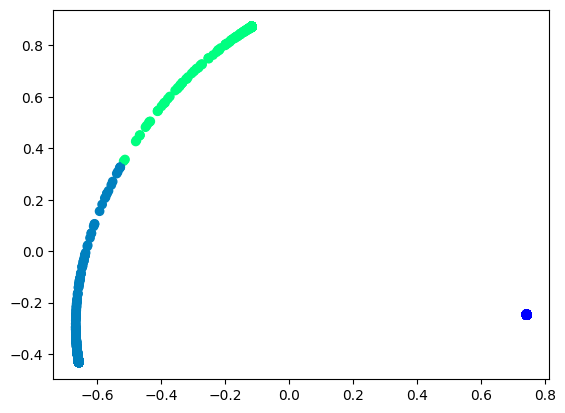

In [7]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters=3, affinity='rbf')

# Training the model and storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

# Visualizing the clustering
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels_rbf, cmap=plt.cm.winter)
plt.show()


## Conclusion
Based on the graph, it's evident that the dataset regarding the detection of IoT botnet attacks is clustered into one group. However, it's noticeable that there's a data point that seems to have shifted away from the main cluster. When there's only one cluster, it suggests that the algorithm didn't find significant differences among our data points to form distinct groups. This implies our data is quite uniform, and the algorithm couldn't pinpoint clear subgroups. Several reasons could account for this, like our data being naturally similar, the clustering algorithm or its settings not being the best match, or perhaps our dataset lacking enough variability to reveal clear clusters. It might be helpful to explore the features in our data, try out different clustering methods or parameters, and seek advice from domain experts if applicable. The absence of multiple clusters could be entirely reasonable based on the characteristics of our data.

## Eigenvector Centrality

Given the following graph below, find it eigenvector centrality

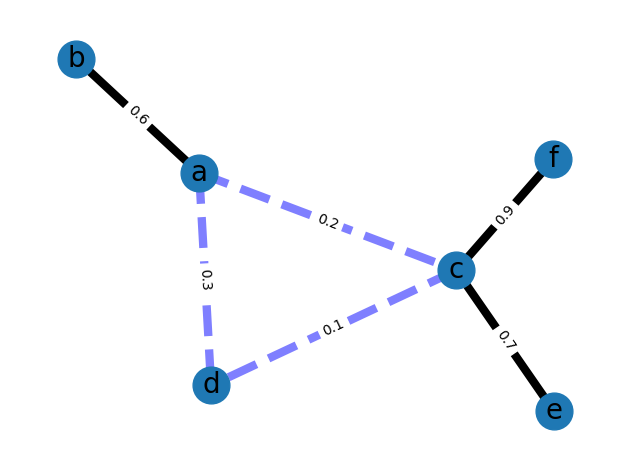

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [9]:
nx.eigenvector_centrality(G)

{'a': 0.51807347662071,
 'b': 0.21182192277183212,
 'c': 0.5986761070959697,
 'd': 0.4566010978754134,
 'e': 0.24477918831750853,
 'f': 0.24477918831750853}

# Assignment 2

Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).
On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

# On the process of making